In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner as corner

import importlib as imp
import sbi_KL_parallel as sbi
imp.reload(sbi)

/home/mpieroni/.pyenv/versions/3.10.9/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'sbi_KL_parallel' from '/home/mpieroni/my_projects/ACP_criterion/ACP-test/scripts/sbi_KL_parallel.py'>

In [25]:
ls data

gaussian_mixture_111_10.npz  two_moons_311_10.npz  two_moons_500_10.npz
gaussian_mixture_41_10.npz   two_moons_350_10.npz
two_moons_200_10.npz         two_moons_400_10.npz


In [26]:
num_epochs = 111
check_every = 10
example_name = "gaussian_mixture"

In [27]:
data = np.load('data/'+example_name + f"_{num_epochs}_{check_every}.npz")

Text(0.5, 1.0, '111')

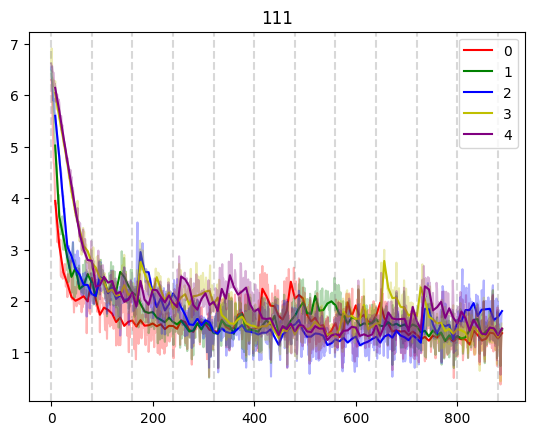

In [28]:
sbi.plot_losses(data['train'], data['val'], num_epochs=data['val'].shape[-1])  
plt.title(int(num_epochs)) 

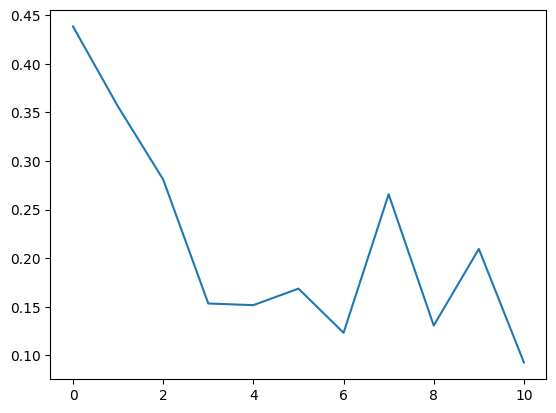

In [30]:
plt.plot(data['KL'][:,0,1])

In [65]:
import sbibm

i_obs = 2

example_name = "gaussian_mixture"
task = sbibm.get_task(example_name)
prior = task.get_prior_dist()
simulator = task.get_simulator()
observation = task.get_observation(num_observation=i_obs+1)
data_test = np.array(task.get_reference_posterior_samples(num_observation=i_obs+1))

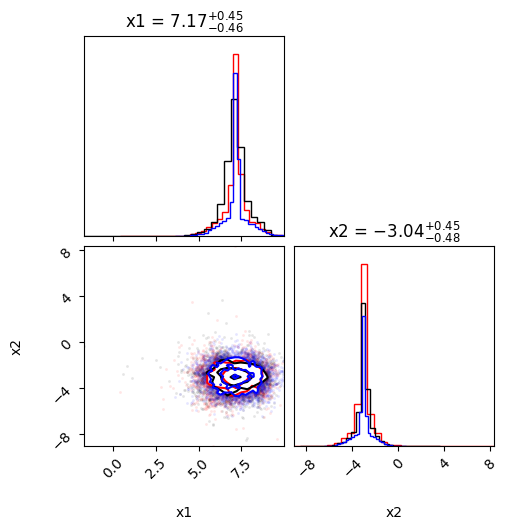

In [66]:
fig = corner.corner(data['post_samples'][i_obs,0], labels=['x1', 'x2'], show_titles=True, color='red', bins=30, smooth=.3)

corner.corner(data['post_samples'][i_obs,1], labels=['x1', 'x2'], show_titles=True, color='black', fig=fig, bins=30, smooth=.3);

corner.corner(data_test, labels=['x1', 'x2'], show_titles=True, color='blue', fig=fig, bins=30, smooth=.3);

In [67]:
from scipy.stats import ks_2samp

In [68]:
data['post_samples'][i_obs,0].shape

(10000, 2)

In [69]:
ks_2samp(data['post_samples'][i_obs,0], data_test, axis=0)

# ks_2samp(data['post_samples'][i_obs,0], data_test)

KstestResult(statistic=array([0.0616, 0.0431]), pvalue=array([6.48414703e-17, 1.70386993e-08]), statistic_location=array([ 7.30645704, -3.15288711]), statistic_sign=array([-1.,  1.]))

In [83]:
d1 = np.random.multivariate_normal(np.zeros(2), np.eye(2), 1000)
d2 = np.random.multivariate_normal(np.zeros(2)+3e-2, np.eye(2), 1000)

In [84]:
ks_2samp(d1, d2, axis=0)

KstestResult(statistic=array([0.042, 0.056]), pvalue=array([0.34112475, 0.08689937]), statistic_location=array([-0.65695784, -0.03797754]), statistic_sign=array([1., 1.]))